In [1]:
from ase.io import read, write, Trajectory
import numpy as np

In [2]:
def CoM(clus):
    """
    Support function to set the origin of the cluster at the centre of the mass
    """
    (cx, cy, cz) = clus.get_center_of_mass()
    new_xyz = []
    for i, a in enumerate(clus):
        x, y, z = a.position
        x -= cx
        y -= cy
        z -= cz
        new_xyz.append((x, y, z))
    clus.set_positions(new_xyz)
    return clus

In [3]:
def checkSimilar(clus1, clus2):

    """Check whether two clusters are similar or not by comparing their moments of inertia"""
    Inertia1 = clus1.get_moments_of_inertia()
    Inertia2 = clus2.get_moments_of_inertia()
    # print(Inertia1, Inertia2, 'diff: ', Inertia1-Inertia2)

    tol = 0.01
    if (
        Inertia1[0] * (1 - tol) <= Inertia2[0] <= Inertia1[0] * (1 + tol)
        and Inertia1[1] * (1 - tol) <= Inertia2[1] <= Inertia1[1] * (1 + tol)
        and Inertia1[2] * (1 - tol) <= Inertia2[2] <= Inertia1[2] * (1 + tol)
    ):
        similar = True
    else:
        similar = False

    return similar

In [4]:
ini_gen = 0
end_gen = 10

In [5]:
ene_tol = 0.02
dist_tol = 0.02

num_check_similar = 0
diff_dist_abs_sum_list = []

non_similar_clus = []
similar_clus = []
non_similar_clus_ene_list = []
similar_clus_ene_list = []
non_similar_clus_diff_dist = []
similar_clus_diff_dist = []

n_traj1_list = []
n_traj2_list = []

for k in range(ini_gen, end_gen):
    file1  = 'mut_after_relax_gen'+str(k+1)+'.traj'
    file2  = 'vasp_mut_after_relax_gen'+str(k+1)+'.traj'

    traj1 = Trajectory(file1)
    traj2 = Trajectory(file2)
    
    n_traj1 = len(traj1)
    n_traj2 = len(traj2)
    n_traj1_list.append(n_traj1)
    n_traj2_list.append(n_traj2)
    
    for i in range(len(traj1)):
        num_check_similar = num_check_similar + 1
        clus1 = traj1[i]
        clus2 = traj2[i]
        
        ene1 = clus1.get_potential_energy()
        ene2 = clus2.get_potential_energy()
        diff_ene = ene1 - ene2
        
        dist1 = clus1.get_all_distances() 
        dist2 = clus2.get_all_distances()
        diff_dist = dist1 - dist2
        diff_dist_abs = np.absolute(diff_dist)
        diff_dist_avg = np.sum(diff_dist_abs) / len(diff_dist)**2
        
        inertia1 = clus1.get_moments_of_inertia()
        inertia2 = clus2.get_moments_of_inertia()
        diff_inertia = inertia1 - inertia2
              
        if checkSimilar(clus1, clus2) == True:
            #if (diff_dist_avg > dist_tol) or (abs(diff_ene) > ene_tol):
            if diff_dist_avg > dist_tol:
                #if abs(diff_ene) > ene_tol:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                #else:
                    #similar_clus.append((k,i))
                    #similar_clus_ene_list.append(diff_ene)
                    #similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                    
            
            else:
                similar_clus.append((k,i))
                similar_clus_ene_list.append(diff_ene)
                similar_clus_diff_dist.append(diff_dist_avg)
                #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                
        else:
            if diff_dist_avg < dist_tol:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                else: 
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
            else:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )

print(len(non_similar_clus))
print(len(similar_clus))
print(num_check_similar)

#print(sorted(non_similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

print(n_traj1_list)
print(n_traj2_list)

(0, 4) 0.1690388237566193 0.0551074199999988 [ 267.26432307 -321.54307187   31.69818659]
(0, 5) 0.27214829943060026 -0.00022038000000179636 [-0.10209137  4.00516924  1.64472689]
(0, 6) 0.1862868847834031 -0.0440900099999979 [ 196.9941685  -203.98260411   11.28528703]
(1, 1) 0.3519671703397796 -1.1484716400000003 [  79.20594139 -362.94316568 -298.09617568]
(1, 2) 0.15786915708704322 -0.2780897299999978 [-179.92525962  172.06488622  -45.21624636]
(1, 5) 0.16546805809827841 0.055952019999999436 [ 277.17844356 -329.91606308   36.03941517]
(1, 6) 0.27148614877538946 -0.0010957100000013043 [ 1.01359643  1.07458435 -2.85984453]
(1, 8) 0.3240194718698075 -0.2270787399999996 [-171.1832967   294.60785045    6.74934709]
(1, 9) 0.31876899218266 -0.06214033999999913 [-240.38785066  303.38032221  -30.95005631]
(2, 4) 0.15589423901295354 0.0582653800000017 [ 255.73641152 -310.31849733   36.86184241]
(2, 6) 0.8519463359335347 -2.5869568800000025 [  378.82117997 -1965.12671582 -1802.80953266]
(2, 7) 0.

In [6]:
filename="clus_Pd5.log"

parent_calls_list = []
with open(filename, 'r') as fh:
    for line in fh:
        if line.startswith("Parent"):
            line = line.strip()
            words = line.split(':')
            words[1] = words[1].lstrip()
            parent_calls_list.append(words[1])
#print(parent_calls_list)
#print((parent_calls_list[0]))

item_split = []
for item in parent_calls_list:
    print( item)
    item_split.append(item.split(","))
#print(item_split)

#print(item_split[0])


[5, 4, 4, 5, 12, 15, 13]
[5, 15, 8, 11, 10, 8, 13, 4, 18, 15]
[10, 5, 4, 17, 10, 9, 11, 18, 11, 13]
[5, 10, 11, 10, 4]
[12, 5, 4, 5]
[5, 8, 4, 17, 10, 8, 15, 20, 12, 11]
[5, 9, 10]
[10, 5, 5, 6]
[15, 10, 6, 4, 4]
[11, 5, 6, 13, 13]


In [7]:
new_vasp_calls = []
len_new_vasp_calls = []
for i in range(len(item_split)):
    k=len(item_split[i])
    new_int_list = []
    
    a = list(item_split[i][0].lstrip())
    del a[0] 
    a = int(''.join(a))
    new_int_list.append(a)
    #print(a)
    for k in range(1,(len(item_split[i])-1)):
        b = int(item_split[i][k])
        new_int_list.append(b)
        #print(b)  
    c = list(item_split[i][-1].lstrip())
    del c[-1]
    c = int(''.join(c))
    new_int_list.append(c)
    #print(c)
    #print(new_int_list)
    len_new_list = len(new_int_list)
    new_vasp_calls.append(new_int_list)
    len_new_vasp_calls.append(len_new_list)
print(new_vasp_calls)
print(len(new_vasp_calls))
print(len_new_vasp_calls)
print(sum(len_new_vasp_calls))

[[5, 4, 4, 5, 12, 15, 13], [5, 15, 8, 11, 10, 8, 13, 4, 18, 15], [10, 5, 4, 17, 10, 9, 11, 18, 11, 13], [5, 10, 11, 10, 4], [12, 5, 4, 5], [5, 8, 4, 17, 10, 8, 15, 20, 12, 11], [5, 9, 10], [10, 5, 5, 6], [15, 10, 6, 4, 4], [11, 5, 6, 13, 13]]
10
[7, 10, 10, 5, 4, 10, 3, 4, 5, 5]
63


In [8]:
print(len(similar_clus))
print(similar_clus)

32
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 3), (1, 4), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 5), (3, 0), (3, 1), (3, 4), (4, 1), (4, 2), (4, 3), (5, 0), (5, 1), (5, 2), (6, 0), (7, 1), (7, 2), (7, 3), (8, 2), (8, 3), (8, 4), (9, 1), (9, 2), (9, 4)]


In [9]:
file_vasp="results_all.log"

vasp_calls = []
vasp_calls_list = []
with open(file_vasp, 'r') as fh:
    total_images = []
    for line in fh:       
        if "VASP Calls" in line:
            line = line.strip()
            words = line.split(':')
            words[1] = int(words[1].lstrip())
            vasp_calls.append(words[1])
        if "Total images in the trajectory" in line:
            line = line.strip()
            img_num = line.split(':')
            img_num[1] = int(img_num[1].lstrip())
            total_images.append(img_num[1])

print(vasp_calls)
#print(len(vasp_calls))
#print(total_images)
#print(len(total_images))
#print(sum(total_images))
print('\n')

kk = 0
for i in total_images:
    traj_calls = []
    for j in range(kk, kk+i):
        traj_calls.append(vasp_calls[j])
    vasp_calls_list.append(traj_calls)
    kk = kk + i

print(vasp_calls_list)

[7, 3, 3, 3, 32, 54, 60, 7, 19, 18, 47, 49, 39, 39, 3, 45, 66, 71, 7, 3, 83, 47, 37, 7, 41, 16, 17, 7, 44, 32, 18, 3, 44, 7, 3, 3, 6, 48, 3, 36, 31, 101, 9, 60, 43, 17, 7, 38, 47, 29, 7, 3, 3, 54, 17, 6, 3, 3, 52, 3, 6, 46, 65]


[[7, 3, 3, 3, 32, 54, 60], [7, 19, 18, 47, 49, 39, 39, 3, 45, 66], [71, 7, 3, 83, 47, 37, 7, 41, 16, 17], [7, 44, 32, 18, 3], [44, 7, 3, 3], [6, 48, 3, 36, 31, 101, 9, 60, 43, 17], [7, 38, 47], [29, 7, 3, 3], [54, 17, 6, 3, 3], [52, 3, 6, 46, 65]]


In [10]:
print(new_vasp_calls)

[[5, 4, 4, 5, 12, 15, 13], [5, 15, 8, 11, 10, 8, 13, 4, 18, 15], [10, 5, 4, 17, 10, 9, 11, 18, 11, 13], [5, 10, 11, 10, 4], [12, 5, 4, 5], [5, 8, 4, 17, 10, 8, 15, 20, 12, 11], [5, 9, 10], [10, 5, 5, 6], [15, 10, 6, 4, 4], [11, 5, 6, 13, 13]]


In [11]:
print(similar_clus)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 3), (1, 4), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 5), (3, 0), (3, 1), (3, 4), (4, 1), (4, 2), (4, 3), (5, 0), (5, 1), (5, 2), (6, 0), (7, 1), (7, 2), (7, 3), (8, 2), (8, 3), (8, 4), (9, 1), (9, 2), (9, 4)]


In [12]:
same_clus_almlp = []
same_clus_vasp = []
same_clus_diff = []
for i in range(len(similar_clus)):
    p = similar_clus[i][0]
    q = similar_clus[i][1]
    
    r = new_vasp_calls[p][q] #clus_XXX.log AL
    same_clus_almlp.append(r)
    s = vasp_calls_list[p][q] #results.log DFT
    same_clus_vasp.append(s)
    
    same_clus_diff.append(s-r)
    #print(r, s, s-r)
print(same_clus_almlp)
print(sum(same_clus_almlp))
print(same_clus_vasp)
print(sum(same_clus_vasp))
print(same_clus_diff)
print(sum(same_clus_diff))
print(len(same_clus_diff))

[5, 4, 4, 5, 5, 11, 10, 4, 10, 5, 4, 17, 9, 5, 10, 4, 5, 4, 5, 5, 8, 4, 5, 5, 5, 6, 6, 4, 4, 5, 6, 13]
202
[7, 3, 3, 3, 7, 47, 49, 3, 71, 7, 3, 83, 37, 7, 44, 3, 7, 3, 3, 6, 48, 3, 7, 7, 3, 3, 6, 3, 3, 3, 6, 65]
553
[2, -1, -1, -2, 2, 36, 39, -1, 61, 2, -1, 66, 28, 2, 34, -1, 2, -1, -2, 1, 40, -1, 2, 2, -2, -3, 0, -1, -1, -2, 0, 52]
351
32


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

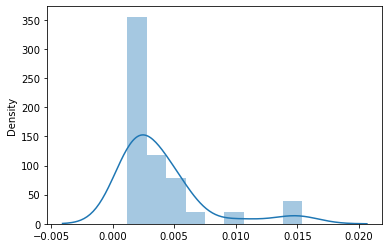

In [13]:
import seaborn as sns
sns.distplot(similar_clus_diff_dist)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

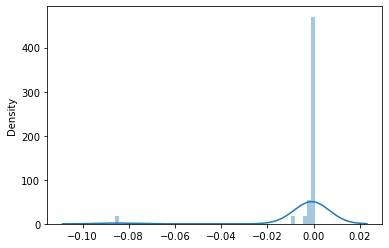

In [14]:
sns.distplot(similar_clus_ene_list)

In [15]:
print(sorted(similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

[-0.0859791699999981, -0.00828065000000322, -0.003238079999999144, -0.002660720000001504, -0.0014893600000007723, -0.0013537600000006478, -0.0012564499999996315, -0.0010094000000009373, -0.0007960500000017134, -0.000759750000000281, -0.0007287799999993183, -0.0006592699999998786, -0.0006506599999980267, -0.0006024999999993952, -0.0005013600000012275, -0.0005013600000012275, -0.0004824799999987306, -0.0004613800000008439, -0.0004561699999996449, -0.00038622000000287926, -0.0003854399999987379, -0.0003337300000012533, -0.0003337300000012533, -0.00033031000000249833, -0.0003085899999994979, -0.00023040000000129623, -0.0001601899999990053, -5.446999999847435e-05, 2.187999999847534e-05, 3.2889999999952124e-05, 0.0001105599999995377, 0.00041910999999927867]


In [16]:
print(sorted(similar_clus_diff_dist))

[0.0011663372776453684, 0.001236027932390016, 0.0012855545301266246, 0.001285554698988385, 0.0013506415199837818, 0.0013506417387093704, 0.0015590260876774664, 0.0016563638195106734, 0.0018479010033890476, 0.001848245447690715, 0.0019198138191801207, 0.0019876931864885707, 0.002062419817651815, 0.002096748069836529, 0.0022303823474984696, 0.0026714194743849263, 0.002676948429449375, 0.0027088353070542225, 0.0036157247984261788, 0.003935221334593848, 0.004007952839679767, 0.004187482957926321, 0.004254990423922606, 0.004326827472982017, 0.004991401969648344, 0.005030484993418476, 0.0055544897927836704, 0.005788376670268889, 0.006139330196620421, 0.010383816078485495, 0.014307260572657193, 0.015414526007575945]
